# Kepler problem

We have an Hamiltonian system
$$\dot{y} = J^{-1} \nabla H(y) $$
with $y = (p,q) \in \mathbb{R}^{2d}$ and $J=\begin{pmatrix}0 & I \\ -I & 0 \end{pmatrix} \in M_{2d}(\mathbb{R})$

In this case  $d=2$ and we have the following hamiltonian with $p =(p_1,p_2)$ and $q =(q_1,q_2)$ 
\begin{equation}
H(p,q) = \frac{1}{2}\left\lVert  p\right\rVert_2^2 - \frac{1}{\left\lVert  q\right\rVert_2}
\end{equation}

Where we denote $\left\lVert  \cdot\right\rVert_2$ as the euclidean norm on $\mathbb{R}^{2d}$.

Thus we have

$$
\left\{\begin{matrix}
       \frac{\partial p}{\partial t} &=& -\frac{q}{\left\lVert  q\right\rVert_2^3} \\
       \frac{\partial q}{\partial t} &=& p\\
\end{matrix}\right.
$$


### Imports

In [1]:
import sys
sys.path.append('../Euler')
sys.path.append('../RK')
sys.path.append('../Parareal')
sys.path.append('../Stormer')
sys.path.append('../Problems')

import parareal as para
import RK2
import RK4 
import StormerKepler as SK
import HamiltonianFunctions as func
import numpy as np
import matplotlib.pyplot as plt
#matplotlib.rcParams['figure.figsize'] = [10, 5]


### Constants

In [2]:
T = 100
N = 10*T
delta_t = T/N
e = 0.1
y0 = np.double([0,np.sqrt((1+e)/(1-e)),1-e,0])
dtg = delta_t
dtf = dtg/100
kmax = 8
tab_t = np.linspace(0, T, N+1)
sol_ex = SK.tab_Stormer(func.Kepler,0,T,y0,dtf)
print("T:",T)
print("N:",N)
print("delta_t:",delta_t)
print("dtg:", dtg)
print("dtf:",dtf)

T: 100
N: 1000
delta_t: 0.1
dtg: 0.1
dtf: 0.001


## Approximation computation

In [3]:
tab_y = para.parareal_bis(func.Kepler, SK.Stormer,SK.Stormer, y0, dtf, dtg, delta_t,T)

T: 100
N: 1000
delta_t: 0.1
dtg 0.1
dtf 0.001
k: 1
k: 2
k: 3
k: 4
k: 5
k: 6
k: 7
k: 8
k: 9
k: 10
k: 11
k: 12
k: 13
k: 14
k: 15
k: 16


## Error computation on parareal algorithm for harmonic oscillator

### Absolute Error

In [4]:
tab_err = para.err(tab_y,sol_ex)

### Energy error

In [5]:
Ha0 = 0.5*(y0[0]**2+y0[1]**2) - 1/np.sqrt(y0[2]**2 + y0[3]**2)
tab_Ha0 = Ha0*np.ones(len(tab_y[0]))
tab_Ha = para.Ha_err(tab_y,tab_Ha0,func.HaKepler)

## Error plot

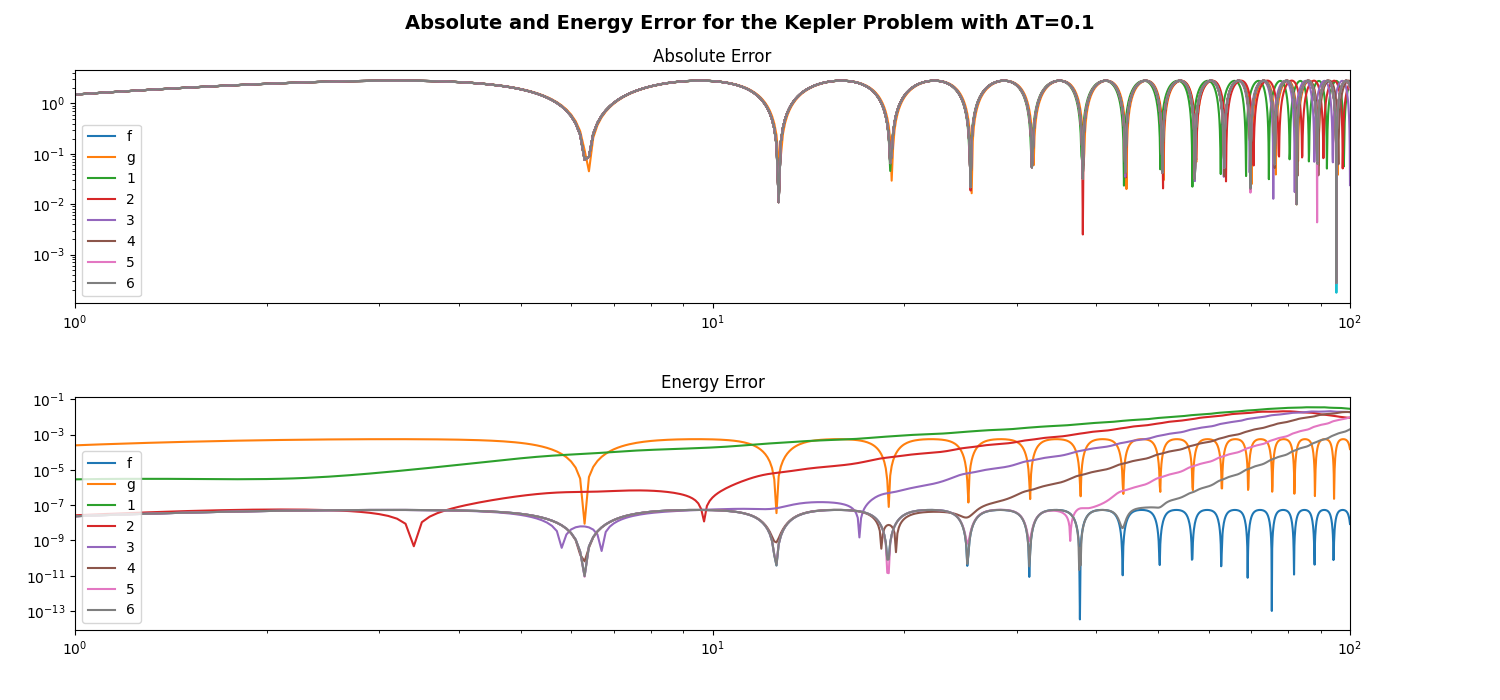

In [6]:
%matplotlib widget
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,7))

fig.suptitle(f"Absolute and Energy Error for the Kepler Problem with \u0394T={delta_t}",fontsize='14',fontweight='bold')
plt.subplots_adjust(left=0.05, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# Absolute error
for k in range(len(tab_err)):
    ax1.loglog(tab_t,np.abs(tab_err[k,:]))    
    
ax1.set(title='Absolute Error',xlim=(1,T))
ax1.legend(['f','g','1','2','3','4','5','6'] )

#Energy error
for k in range(kmax):
    ax2.loglog(tab_t,tab_Ha[k,:])
   
ax2.set(title='Energy Error',xlim=(1,T))
ax2.set_xlim(1,T)
ax2.legend(['f','g','1','2','3','4','5','6'] )